In [55]:
import pandas as pd
import numpy as np
import os

folder_path = 'shell_script_results/'

combined_data = pd.DataFrame()

for dirpath, dirnames, filenames in os.walk(folder_path):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        # Check if the item is a file and ends with '.txt'
        if os.path.isfile(file_path) and filename.endswith('.txt') and 'dtag' in filename:
            # Read the text file into a DataFrame
            df = pd.read_csv(file_path, sep=';', header=None)
            # Concatenate the current DataFrame with the combined_data
            combined_data = pd.concat([combined_data, df], axis=1, ignore_index=True)

combined_data.shape
dataset = combined_data.to_numpy()

dataset = np.reshape(dataset, (3,-1,18))
dataset.shape


(3, 30, 18)

In [56]:
successful_counts = np.zeros(dataset.shape[-1])
for data in dataset[2]:
    for i in range(len(data)):
        if data[i] == 1:
            successful_counts[i] += 1
successful_counts

array([10., 25., 27., 25., 26., 29., 22., 25., 27., 23., 23., 23., 22.,
       23., 23., 22., 19., 15.])

In [57]:
average_times = np.zeros(dataset.shape[-1])
for data in dataset[0]:
    for i in range(len(data)):
        if str(data[i]) != 'nan':
            average_times[i] += (data[i]/dataset.shape[1])
        else:
            average_times[i] += (2000/dataset.shape[1])
average_times

array([  10.8       ,  507.83333333,  710.26666667,  868.76666667,
        991.83333333, 1098.43333333, 1212.36666667, 1310.66666667,
       1389.4       , 1469.26666667, 1545.6       , 1622.13333333,
       1681.06666667, 1736.2       , 1796.36666667, 1852.56666667,
       1908.3       , 1944.16666667])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


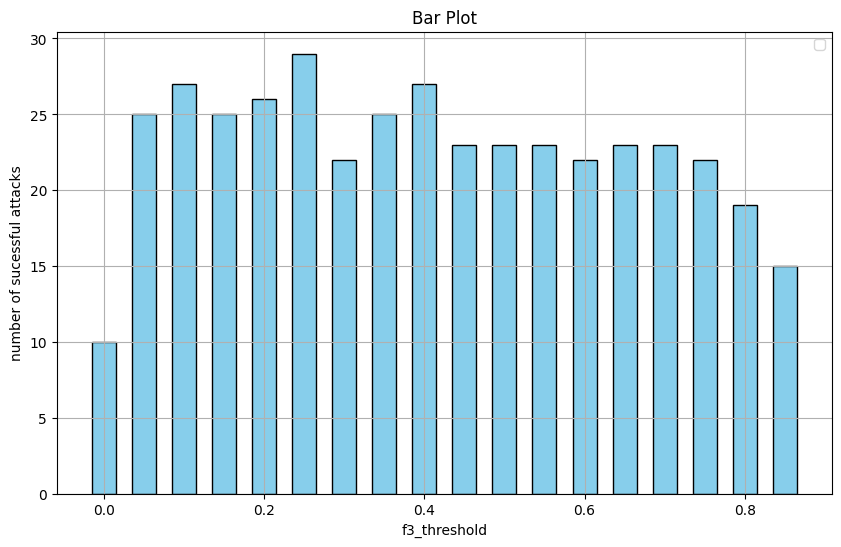

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.bar(np.arange(0, 0.9, 0.05), successful_counts, width=bar_width, color='skyblue', edgecolor='black')

plt.title('Bar Plot')
plt.xlabel('f3_threshold')
plt.ylabel('number of sucessful attacks')
plt.legend()
plt.savefig("01_f3_threshold_varying_success.png")

Text(0, 0.5, 'average time of attacks')

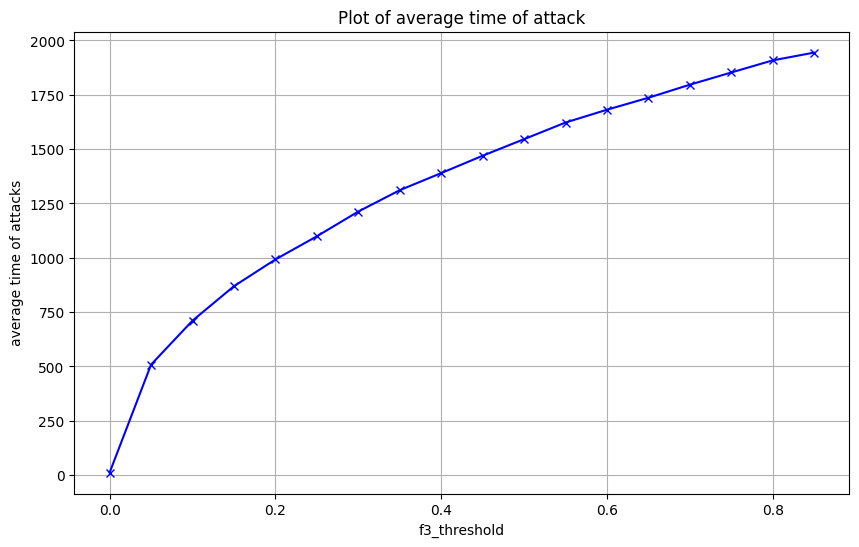

In [59]:
plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.plot(np.arange(0, 0.9, 0.05), average_times, color='blue',marker='x')

plt.title('Plot of average time of attack')
plt.xlabel('f3_threshold')
plt.ylabel('average time of attacks')